## JuTrack Integration

In [1]:
import numpy as np
import pandas as pd
from scipy.constants import c, e, physical_constants

from synapticTrack.beam import *
from synapticTrack.io import *
from synapticTrack.visualizations import *

## Compute Beam Center

### Track Input Beam Distribution

In [2]:
base_dir = '../data/input_beam'
filename = base_dir + '/' + 'coord.out'

beam_io_manager = BeamDataIOManager() 
beam = beam_io_manager.read(code='track', filename=filename, mass_number=40, charge_state=8, beam_current=0, reference_energy=0.010)
beam.state

,Nseed,iq,dt,dW,x,xp,y,yp
0,0,1,0.0000,-3.543100e-10,0.00000,0.000000,0.00000,0.00000
1,0,1,0.3688,-1.729900e-06,3.64630,0.009006,-5.48030,3.67950
2,0,1,-4.1981,-1.226300e-06,-0.49758,3.552800,-8.43420,2.40290
3,0,1,-6.1599,-2.726600e-06,-0.14469,3.064900,-4.52100,3.18300
4,0,1,-5.7163,-2.263800e-07,-5.69520,3.185900,0.89529,-2.47710
...,...,...,...,...,...,...,...,...
9996,0,1,9.7589,1.559600e-06,3.23200,-2.690800,2.83230,1.66500
9997,0,1,4.0432,-1.363000e-10,-4.31440,3.796700,1.05720,0.21555
9998,0,1,-2.9019,-1.613500e-06,3.23680,-5.662900,4.65420,-3.35200
9999,0,1,5.5605,3.090700e-06,-0.73726,3.854000,-3.29030,-4.44810


In [3]:
x  = beam.x
xp = beam.xp
y  = beam.y
yp = beam.yp
dt = beam.dt
dW = beam.dW

In [4]:
beam.centroid

x     1.436370e-02
xp   -6.793702e-04
y    -2.236773e-04
yp   -2.694488e-05
dt    1.361567e-01
dW   -3.542379e-10
dtype: float64

In [5]:
print(beam.charge_state, beam.mass_number, beam.reference_energy)

8 40 0.01


In [6]:
twiss = Twiss(beam)
print(twiss.values()['twiss_x']['emittance'])
print(twiss.values()['twiss_y']['emittance'])
print(twiss.values()['twiss_z']['emittance'])

12.976084729992449
12.362026251027704
2.0982069992920863e-05


## Track to JuTrack Conversion of Input Beam Distribution

### Test

In [7]:
beam_state = pd.DataFrame({
    'x': [1.0],     # mm
    'xp': [10.0],   # mrad
    'y': [2.0],     # mm
    'yp': [-5.0],   # mrad
    'dt': [1e-9],   # sec
    'dW': [0.001]   # MeV/u
})

In [8]:
beam_state

,x,xp,y,yp,dt,dW
0,1.0,10.0,2.0,-5.0,1.000000e-09,0.001


In [9]:
A = 40         # mass number
Z = 8          # charge state
I = 0          # beam current
Ek = 0.01      # kinetic energy in MeV/u
test_beam = Beam(beam_state, A, Z, I, Ek)
jutrack_coords = JuTrackIO.convert_to_jutrack_coordinates(test_beam)
print(jutrack_coords)

       x     px_p0      y     py_p0         z     delta
0  0.001  0.010487  0.002 -0.005244 -0.001389  0.048809


### Track to JuTrack Conversion of Input Beam Distribution

In [10]:
jutrack_coords = JuTrackIO.convert_to_jutrack_coordinates(beam)
jutrack_coords

,x,px_p0,y,py_p0,z,delta
0,0.000000,0.000000,0.000000,0.000000,-0.000000e+00,-1.771593e-08
1,0.003646,0.000009,-0.005480,0.003679,-5.123103e+05,-8.649920e-05
2,-0.000498,0.003553,-0.008434,0.002403,5.831697e+06,-6.131721e-05
3,-0.000145,0.003064,-0.004521,0.003183,8.556887e+06,-1.363400e-04
4,-0.005695,0.003186,0.000895,-0.002477,7.940670e+06,-1.131912e-05
...,...,...,...,...,...,...
9996,0.003232,-0.002691,0.002832,0.001665,-1.355636e+07,7.797738e-05
9997,-0.004314,0.003797,0.001057,0.000216,-5.616521e+06,-6.815412e-09
9998,0.003237,-0.005662,0.004654,-0.003352,4.031109e+06,-8.067868e-05
9999,-0.000737,0.003855,-0.003290,-0.004449,-7.724244e+06,1.545239e-04


In [11]:
xjt = jutrack_coords['x']
xpjt = jutrack_coords['px_p0']
yjt = jutrack_coords['y']
ypjt = jutrack_coords['py_p0']
z = jutrack_coords['z']
delta = jutrack_coords['delta']

In [12]:
x0 = beam.centroid['x']
xp0 = beam.centroid['xp']
y0 = beam.centroid['y']
yp0 = beam.centroid['yp']

### Phasespace Plots of Initial Beam Distribution with Jutrack

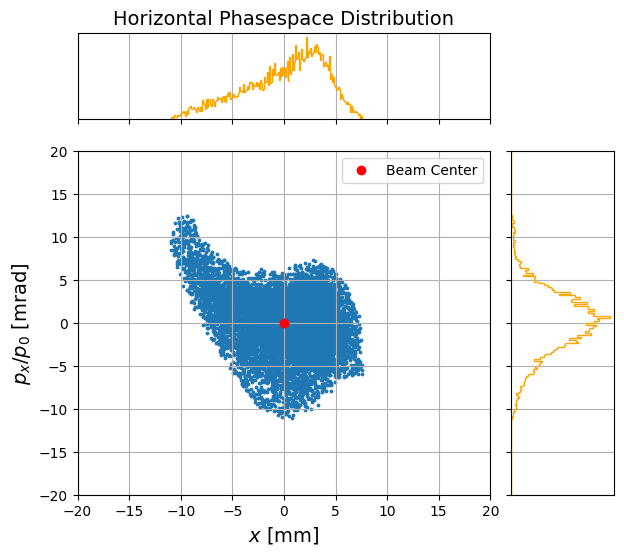

In [13]:
phasespace_plot(xjt*1e3, xpjt*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -20, 20], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x/p_0$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

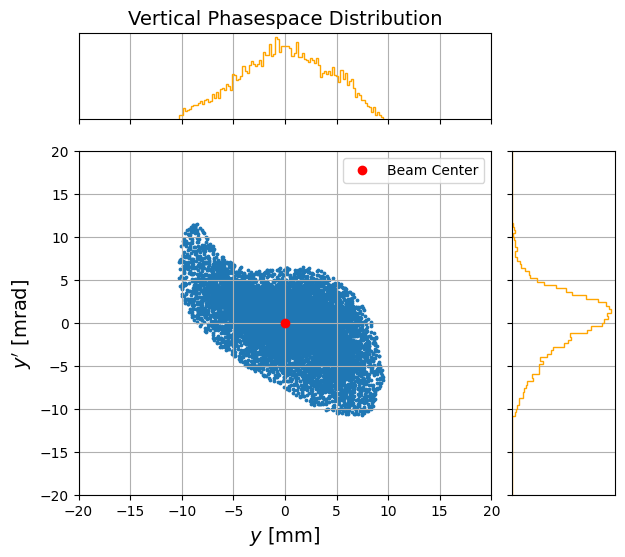

In [14]:
phasespace_plot(yjt*1e3, ypjt*1e3, x_center=y0, y_center=yp0, xyrange=[-20, 20, -20, 20], title='Vertical Phasespace Distribution', 
                xlabel=r'$y$ [mm]', ylabel=r"$y^{\prime}$ [mrad]",
                nbins=100, projection=0, density=False, cmap='viridis', figname=None)

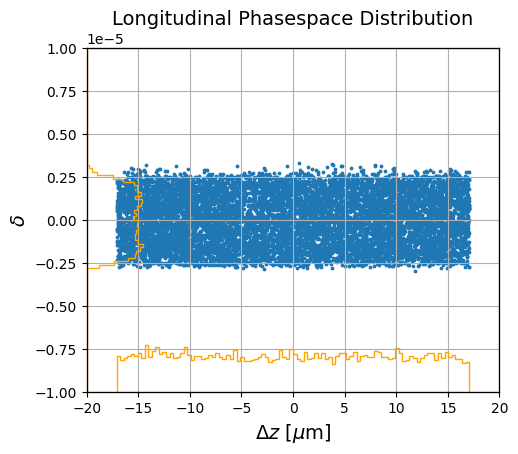

In [15]:
phasespace_plot(z*1e-6, delta*1e-2, xyrange=[-20, 20, -10e-6, 10e-6], title='Longitudinal Phasespace Distribution', 
                xlabel=r'$\Delta z$ [$\mu$m]', ylabel=r"$\delta$", 
                nbins=100, projection=7, density=False, cmap='viridis', figname=None)

### Save beam distribution for JuTrack

In [16]:
beam_io_manager.write('jutrack', filename='jubeam.dat', beam=beam)

## Julia Integration

In [17]:
# PATH Environment Setting for julia
import os
current_path = os.environ.get('PATH', '')
pyenv_bin_path = os.path.expanduser("~/.pyenv/bin")
julia_bin_path = os.path.expanduser("~/Work/simulation_codes-working/julia/usr/bin")
new_path_dirs = [pyenv_bin_path, julia_bin_path]
if current_path:
    new_path_dirs.extend(current_path.split(os.pathsep))
new_path = os.pathsep.join(filter(None, new_path_dirs))
os.environ['PATH'] = new_path

# the number of threads for julia computing
%env JULIA_NUM_THREADS = 2

env: JULIA_NUM_THREADS=2


In [18]:
from julia import Main

Main.eval("using Pkg")
Main.eval('Pkg.activate("/home/cspark/Work/simulation_codes-working/JuTrack.jl")')
Main.eval("Pkg.instantiate()")

Main.eval("using JuTrack")

  Activating project at `~/Work/simulation_codes-working/JuTrack.jl`


### Create Inital Beam Distribution for JuTrack

In [19]:
jubeam = Main.eval('include("beam.jl")')

In [20]:
julattice = Main.eval('include("lebt.jl")')

### Initial Beam Distribution

In [21]:
beam_state0 = jubeam.r
x = beam_state0[:,0]
xp = beam_state0[:,1]
y = beam_state0[:,2]
yp = beam_state0[:,3]
z = beam_state0[:,4]
delta = beam_state0[:,5]

In [22]:
mass_number = beam.mass_number
charge_state = beam.charge_state
beam_current = beam.beam_current
reference_energy = beam.reference_energy
print (mass_number, charge_state, beam_current, reference_energy)

40 8 0 0.01


In [23]:
jubeam_conv = JuTrackIO.convert(beam_state0, mass_number, charge_state, beam_current, reference_energy)
jubeam_conv.state

,x,xp,y,yp,dt,dW
0,0.00000,0.000000,0.00000,0.00000,0.0000,-3.543053e-10
1,3.64630,0.009006,-5.48030,3.67950,0.3688,-1.729900e-06
2,-0.49758,3.552800,-8.43420,2.40290,-4.1981,-1.226300e-06
3,-0.14469,3.064900,-4.52100,3.18300,-6.1599,-2.726600e-06
4,-5.69520,3.185900,0.89529,-2.47710,-5.7163,-2.263800e-07
...,...,...,...,...,...,...
9996,3.23200,-2.690800,2.83230,1.66500,9.7589,1.559600e-06
9997,-4.31440,3.796700,1.05720,0.21555,4.0432,-1.363031e-10
9998,3.23680,-5.662900,4.65420,-3.35200,-2.9019,-1.613500e-06
9999,-0.73726,3.854000,-3.29030,-4.44810,5.5605,3.090700e-06


In [24]:
jubeam_conv.centroid

x     1.436370e-02
xp   -6.793683e-04
y    -2.236773e-04
yp   -2.694322e-05
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

In [25]:
jubeam_twiss = Twiss(jubeam_conv)
print(twiss.values()['twiss_x']['emittance'])
print(twiss.values()['twiss_y']['emittance'])
print(twiss.values()['twiss_z']['emittance'])

12.976084729992449
12.362026251027704
2.0982069992920863e-05


In [26]:
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
y0 = jubeam_conv.centroid['y']
yp0 = jubeam_conv.centroid['yp']

In [27]:
print("initial beam emittance using JuTrack")
Main.eval('get_emittance!(beam::Beam)')
Main.eval('println(beam.emittance)')

initial beam emittance using JuTrack
[1.2975748758096314e-5, 1.2361615875101539e-5, 132.70177382135137]


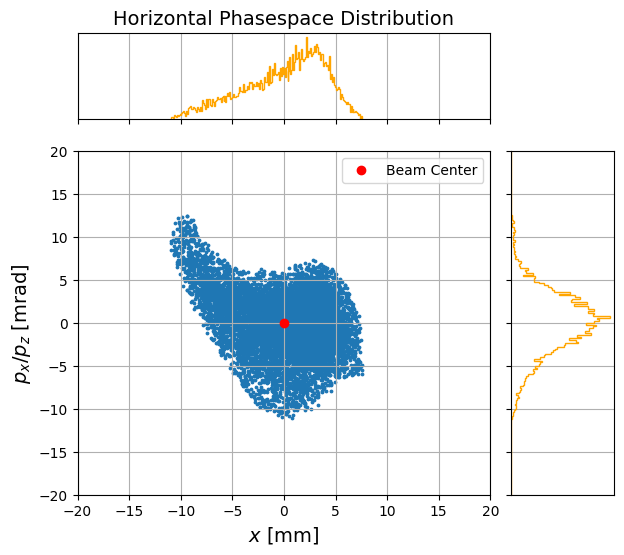

In [28]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -20, 20], title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

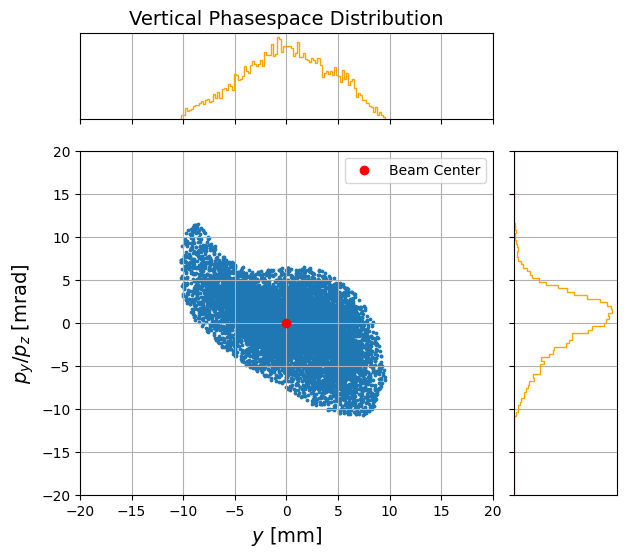

In [29]:
phasespace_plot(y*1e3, yp*1e3, x_center=y0, y_center=yp0, xyrange=[-20, 20, -20, 20], title='Vertical Phasespace Distribution', 
                xlabel=r'$y$ [mm]', ylabel=r"$p_y / p_z$ [mrad]",
                nbins=100, projection=0, density=False, cmap='viridis', figname=None)

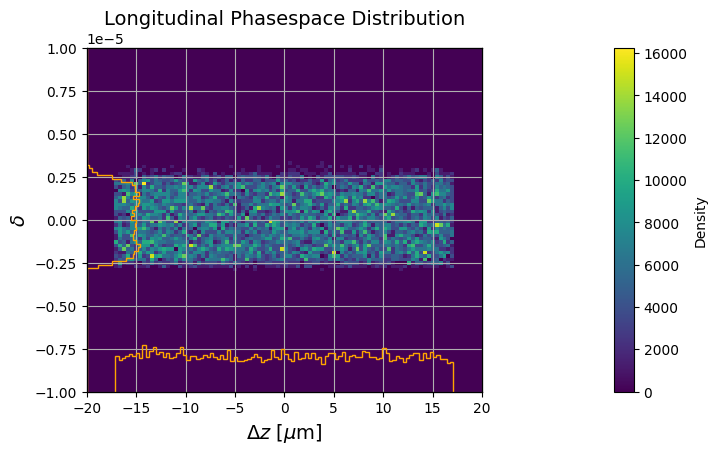

In [30]:
phasespace_plot(z*1e-6, delta*1e-2, xyrange=[-20, 20, -10e-6, 10e-6], title='Longitudinal Phasespace Distribution', 
                xlabel=r'$\Delta z$ [$\mu$m]', ylabel=r"$\delta$", 
                nbins=100, projection=7, density=True, cmap='viridis', figname=None)

### After LEBT Beam Distribution

In [31]:
Main.eval('linepass!(LEBT, beam)')
print("beam emittance at the LEBT exit using Jutrack")
Main.eval('get_emittance!(beam::Beam)')
Main.eval('println(beam.emittance)')

beam emittance at the LEBT exit using Jutrack
[1.293530567137362e-5, 1.2350820789712717e-5, 132.70177382307557]


In [32]:
beam_state = Main.beam.r
x = beam_state[:,0]
xp = beam_state[:,1]
y = beam_state[:,2]
yp = beam_state[:,3]
z = beam_state[:,4]
delta = beam_state[:,5]

In [33]:
jubeam_conv = JuTrackIO.convert(beam_state, mass_number, charge_state, beam_current, reference_energy)
jubeam_conv.state

,x,xp,y,yp,dt,dW
0,-0.000004,0.000102,0.000000,0.000000,-7.328332e-15,-3.543053e-10
1,1.175701,11.145176,1.311940,-3.676253,3.688000e-01,-1.729900e-06
2,-0.125670,10.175515,3.280005,4.343573,-4.198100e+00,-1.226300e-06
3,-0.034222,10.101632,1.025321,-3.481349,-6.159900e+00,-2.726600e-06
4,-1.823375,-6.407629,0.507441,6.420104,-5.716300e+00,-2.263800e-07
...,...,...,...,...,...,...
9996,1.038378,0.457086,-2.050775,-9.192109,9.758900e+00,1.559600e-06
9997,-1.360935,-0.554665,-0.608597,-2.174540,4.043200e+00,-1.363031e-10
9998,0.966061,-8.069061,-1.026327,3.810721,-2.901900e+00,-1.613500e-06
9999,-0.154252,9.186769,3.368988,18.351145,5.560500e+00,3.090700e-06


In [34]:
jubeam_conv.centroid

x     3.907350e-03
xp    4.975307e-02
y     1.092476e-04
yp    4.595001e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

In [35]:
jubeam_twiss = Twiss(jubeam_conv)
print(jubeam_twiss.values()['twiss_x']['emittance'])
print(jubeam_twiss.values()['twiss_y']['emittance'])
print(jubeam_twiss.values()['twiss_z']['emittance'])

12.938999251984727
12.353379641100473
2.0982069985319362e-05


In [36]:
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
y0 = jubeam_conv.centroid['y']
yp0 = jubeam_conv.centroid['yp']

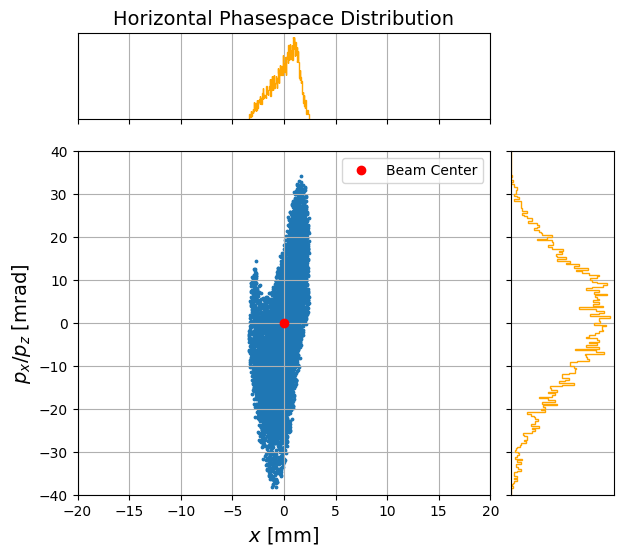

In [37]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

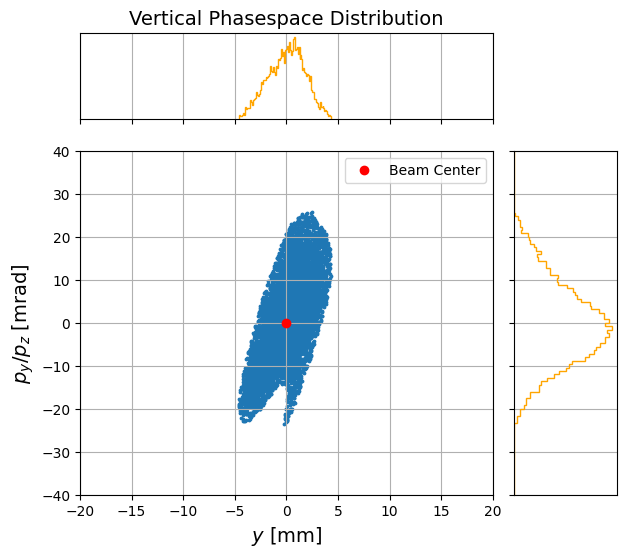

In [38]:
phasespace_plot(y*1e3, yp*1e3, x_center=y0, y_center=yp0, xyrange=[-20, 20, -40, 40], title='Vertical Phasespace Distribution', 
                xlabel=r'$y$ [mm]', ylabel=r"$p_y / p_z$ [mrad]",
                nbins=100, projection=0, density=False, cmap='viridis', figname=None)

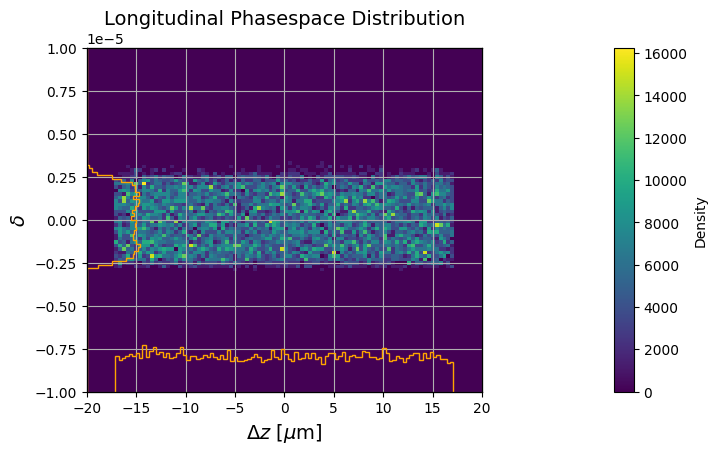

In [39]:
phasespace_plot(z*1e-6, delta*1e-2, xyrange=[-20, 20, -10e-6, 10e-6], title='Longitudinal Phasespace Distribution', 
                xlabel=r'$\Delta z$ [$\mu$m]', ylabel=r"$\delta$", 
                nbins=100, projection=7, density=True, cmap='viridis', figname=None)

### Tracking

In [40]:
jubeam = Main.eval('include("beam.jl")')

In [41]:
track = Main.eval('include("track.jl")')

WS01
AS01
WS02
WS03
WS04
D23


In [42]:
states_at_diags = Main.states_at_diags

In [43]:
states_at_diags

{'AS01': array([[ 5.04366399e-10, -1.05957521e-08,  0.00000000e+00,
          0.00000000e+00, -4.04504264e-09, -1.77159329e-08],
        [-3.35637994e-03,  3.47711157e-03, -2.18348464e-03,
          5.35523532e-03, -5.12310271e+05, -8.64991965e-05],
        [-3.24519845e-03, -4.77412259e-04, -9.05474566e-03,
          1.40669544e-02,  5.83169669e+06, -6.13172088e-05],
        ...,
        [ 2.93651345e-03,  3.02222089e-03,  1.45866080e-03,
         -4.14171111e-03,  4.03110947e+06, -8.06786797e-05],
        [-3.34565176e-03, -5.77683069e-04, -1.29556456e-02,
          1.51039687e-02, -7.72424418e+06,  1.54523892e-04],
        [-4.86321820e-04,  2.60939657e-03,  5.94855370e-03,
         -5.79126018e-03, -3.19860528e+06,  2.23111310e-04]],
       shape=(10001, 6)),
 'WS04': array([[-3.61743974e-08, -2.41678082e-08,  0.00000000e+00,
          0.00000000e+00,  1.01799799e-08, -1.77159329e-08],
        [-4.98506006e-03,  1.14705819e-03, -1.04023405e-03,
          2.62645643e-03, -5.12310278

In [44]:
x = states_at_diags["WS01"][:,0]
xp = states_at_diags["WS01"][:,1]
y = states_at_diags["WS01"][:,2]
yp = states_at_diags["WS01"][:,3]
z = states_at_diags["WS01"][:,4]
delta = states_at_diags["WS01"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS01"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.105735e-02
xp   -2.698708e-02
y    -7.793219e-04
yp   -6.824565e-04
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

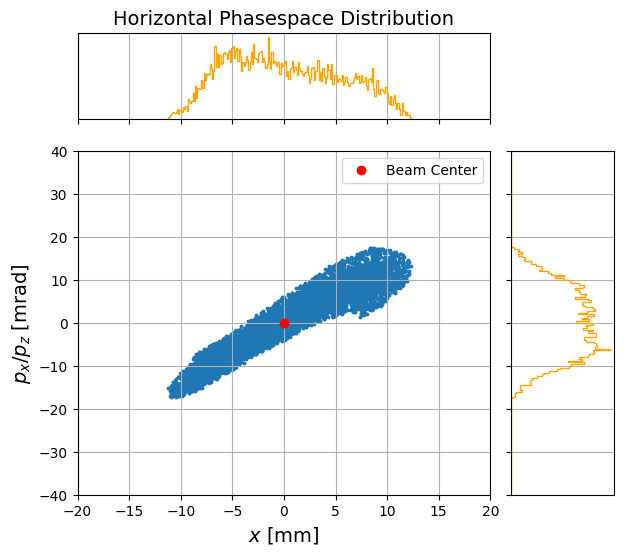

In [45]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [46]:
x = states_at_diags["AS01"][:,0]
xp = states_at_diags["AS01"][:,1]
y = states_at_diags["AS01"][:,2]
yp = states_at_diags["AS01"][:,3]
z = states_at_diags["AS01"][:,4]
delta = states_at_diags["AS01"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["AS01"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -1.323249e-02
xp    1.341790e-02
y    -9.904345e-04
yp    5.517018e-05
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

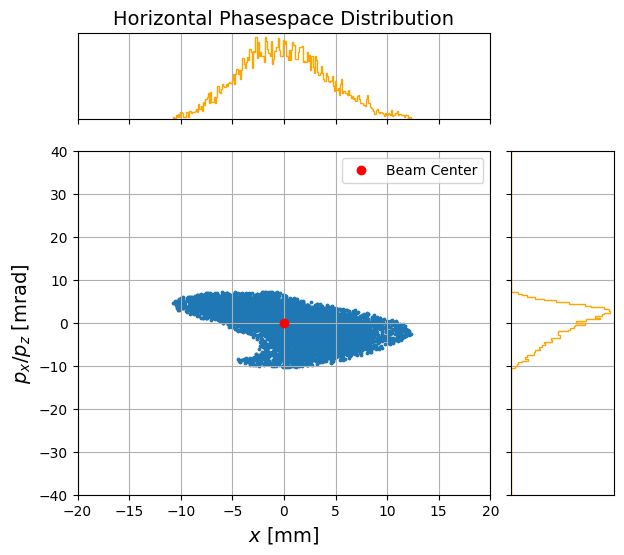

In [47]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [48]:
x = states_at_diags["WS02"][:,0]
xp = states_at_diags["WS02"][:,1]
y = states_at_diags["WS02"][:,2]
yp = states_at_diags["WS02"][:,3]
z = states_at_diags["WS02"][:,4]
delta = states_at_diags["WS02"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS02"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -4.227149e-03
xp   -3.382847e-02
y     9.557482e-04
yp    8.612973e-05
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

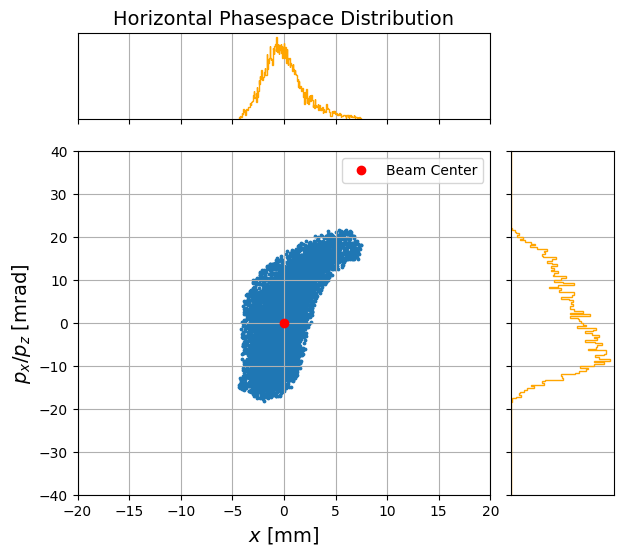

In [49]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [50]:
x = states_at_diags["WS03"][:,0]
xp = states_at_diags["WS03"][:,1]
y = states_at_diags["WS03"][:,2]
yp = states_at_diags["WS03"][:,3]
z = states_at_diags["WS03"][:,4]
delta = states_at_diags["WS03"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS03"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.315449e-02
xp    2.289362e-03
y    -1.749485e-04
yp   -1.768266e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

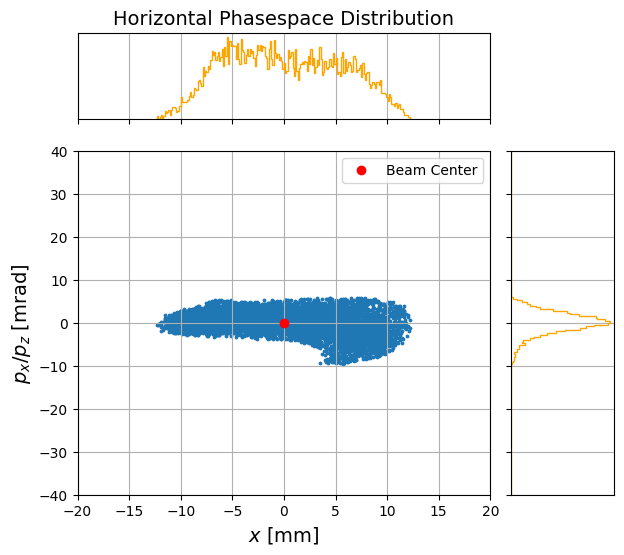

In [51]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [52]:
x = states_at_diags["WS04"][:,0]
xp = states_at_diags["WS04"][:,1]
y = states_at_diags["WS04"][:,2]
yp = states_at_diags["WS04"][:,3]
z = states_at_diags["WS04"][:,4]
delta = states_at_diags["WS04"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS04"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.246814e-02
xp    3.161965e-03
y    -1.546606e-03
yp   -1.892363e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

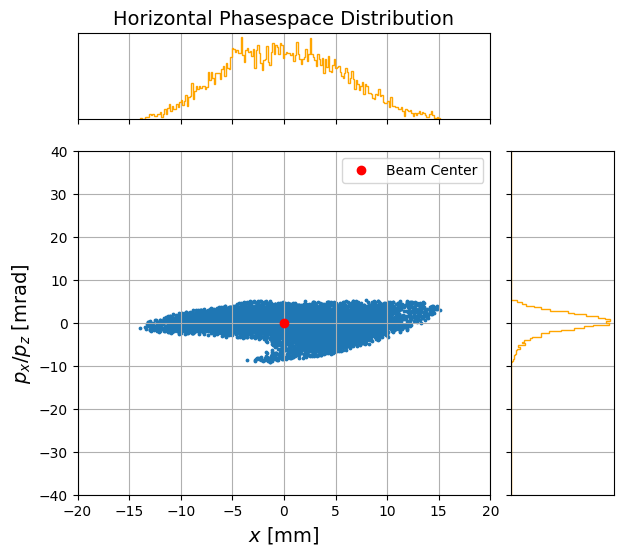

In [53]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [54]:
x = states_at_diags["D23"][:,0]
xp = states_at_diags["D23"][:,1]
y = states_at_diags["D23"][:,2]
yp = states_at_diags["D23"][:,3]
z = states_at_diags["D23"][:,4]
delta = states_at_diags["D23"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["D23"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x     3.907350e-03
xp    4.975307e-02
y     1.092476e-04
yp    4.595001e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

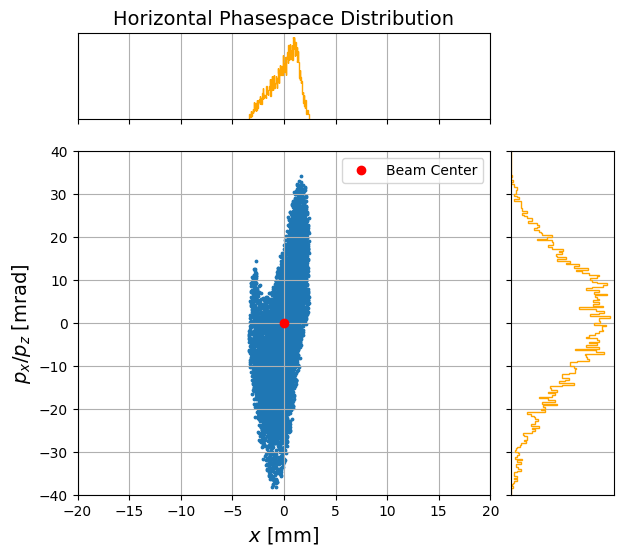

In [55]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

### Tracking with Space Charge Effects

In [56]:
jubeam = Main.eval('include("./beam.jl")')
julattice = Main.eval('include("./lebt_sc.jl")')

In [57]:
track = Main.eval('include("./track_sc.jl")')

WS01
AS01
WS02
WS03
WS04
D23SC


In [58]:
states_at_diags = Main.states_at_diags

In [59]:
x = states_at_diags["WS01"][:,0]
xp = states_at_diags["WS01"][:,1]
y = states_at_diags["WS01"][:,2]
yp = states_at_diags["WS01"][:,3]
z = states_at_diags["WS01"][:,4]
delta = states_at_diags["WS01"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS01"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.105749e-02
xp   -2.698598e-02
y    -7.793219e-04
yp   -6.824566e-04
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

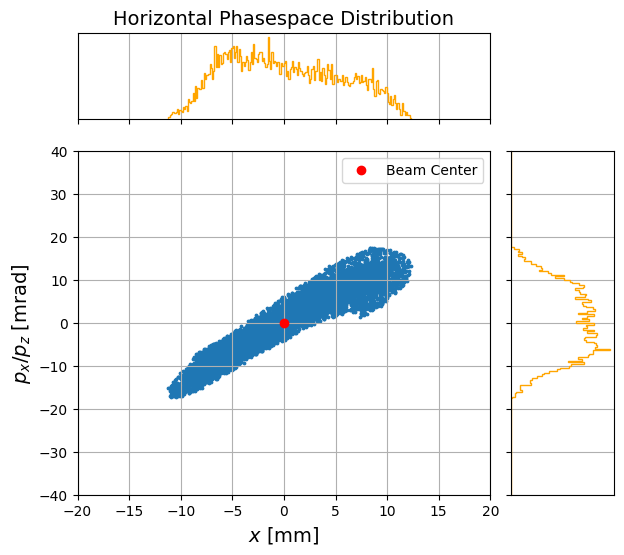

In [60]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [61]:
x = states_at_diags["AS01"][:,0]
xp = states_at_diags["AS01"][:,1]
y = states_at_diags["AS01"][:,2]
yp = states_at_diags["AS01"][:,3]
z = states_at_diags["AS01"][:,4]
delta = states_at_diags["AS01"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["AS01"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -1.323064e-02
xp    1.341893e-02
y    -9.904986e-04
yp    5.513153e-05
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

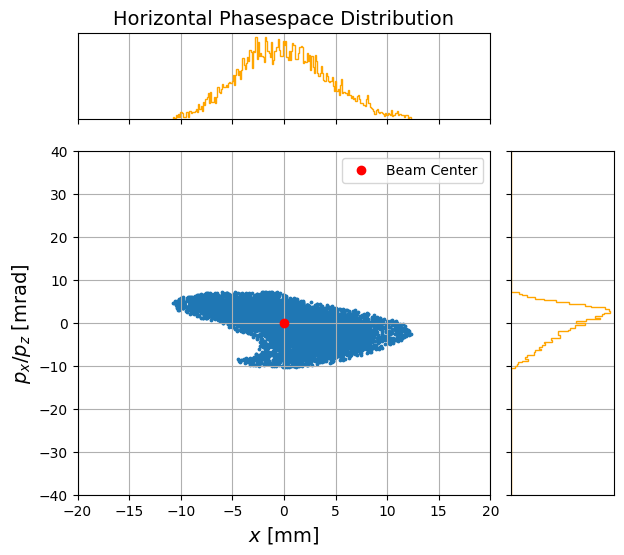

In [62]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [63]:
x = states_at_diags["WS02"][:,0]
xp = states_at_diags["WS02"][:,1]
y = states_at_diags["WS02"][:,2]
yp = states_at_diags["WS02"][:,3]
z = states_at_diags["WS02"][:,4]
delta = states_at_diags["WS02"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS02"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -4.229927e-03
xp   -3.382870e-02
y     9.558038e-04
yp    8.618720e-05
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

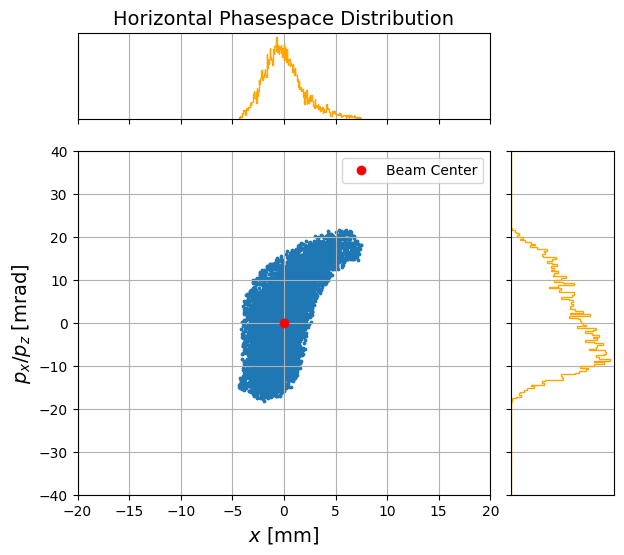

In [64]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [65]:
x = states_at_diags["WS03"][:,0]
xp = states_at_diags["WS03"][:,1]
y = states_at_diags["WS03"][:,2]
yp = states_at_diags["WS03"][:,3]
z = states_at_diags["WS03"][:,4]
delta = states_at_diags["WS03"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS03"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.315188e-02
xp    2.293190e-03
y    -1.749340e-04
yp   -1.768441e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

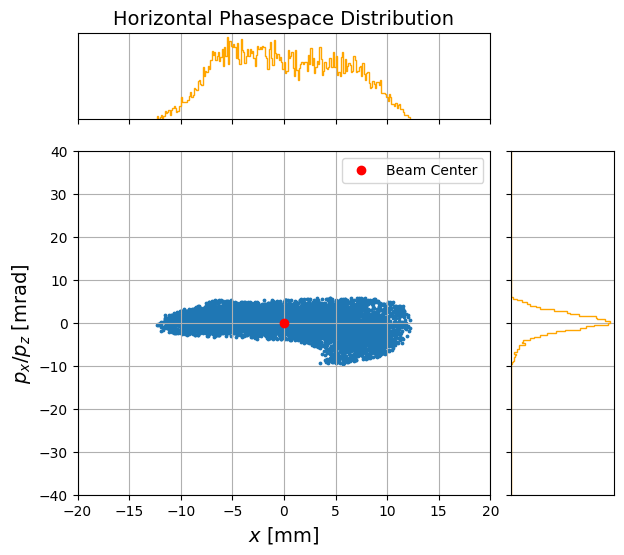

In [66]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [67]:
x = states_at_diags["WS04"][:,0]
xp = states_at_diags["WS04"][:,1]
y = states_at_diags["WS04"][:,2]
yp = states_at_diags["WS04"][:,3]
z = states_at_diags["WS04"][:,4]
delta = states_at_diags["WS04"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["WS04"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x    -2.246244e-02
xp    3.165375e-03
y    -1.546730e-03
yp   -1.892550e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

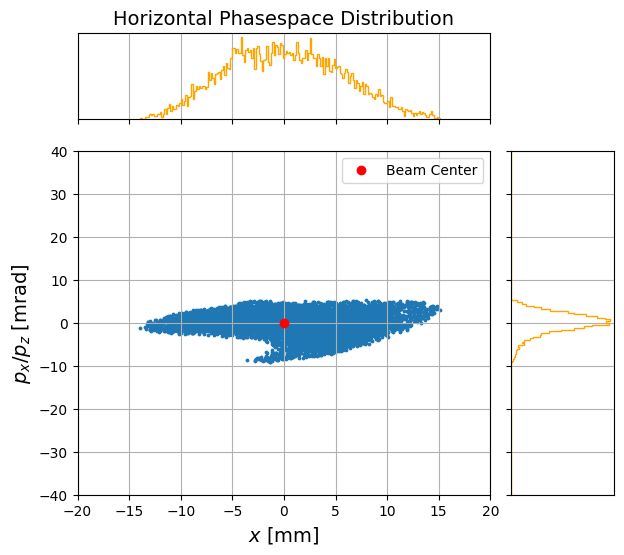

In [68]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)

In [69]:
x = states_at_diags["D23SC"][:,0]
xp = states_at_diags["D23SC"][:,1]
y = states_at_diags["D23SC"][:,2]
yp = states_at_diags["D23SC"][:,3]
z = states_at_diags["D23SC"][:,4]
delta = states_at_diags["D23SC"][:,5]

jubeam_conv = JuTrackIO.convert(states_at_diags["D23SC"], mass_number, charge_state, beam_current, reference_energy)
x0 = jubeam_conv.centroid['x']
xp0 = jubeam_conv.centroid['xp']
jubeam_conv.centroid

x     3.907841e-03
xp    4.973744e-02
y     1.092535e-04
yp    4.595415e-03
dt    1.361567e-01
dW   -3.541720e-10
dtype: float64

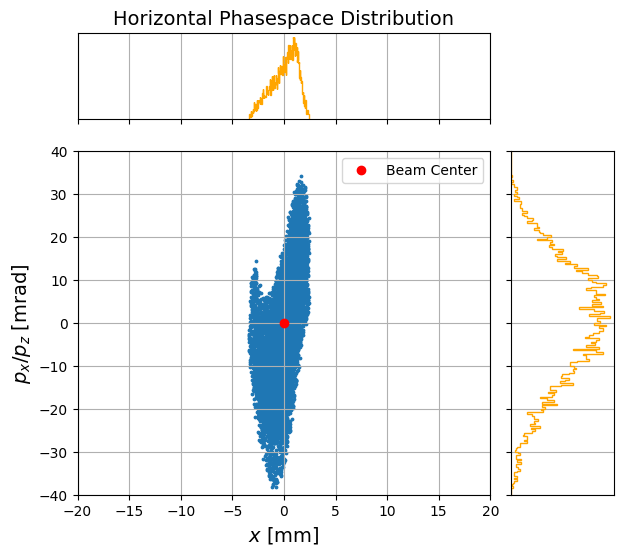

In [70]:
phasespace_plot(x*1e3, xp*1e3, x_center=x0, y_center=xp0, xyrange=[-20, 20, -40, 40], 
                title='Horizontal Phasespace Distribution', 
                xlabel=r'$x$ [mm]', ylabel=r"$p_x / p_z$ [mrad]",
                nbins=200, projection=0, density=False, cmap='viridis', figname=None)